In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import datetime
from sklearn.model_selection import train_test_split

In [75]:
# Read data from CSV
data = pd.read_csv('./dataset/sales/Monthly sales of soft drink hundreds of cases p272 Montgomery.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
now = datetime.datetime.now()
if now.second > 0:
    now = now.replace(second=0, microsecond=0) - datetime.timedelta(minutes=35)
data.index = pd.date_range(now, freq='min', periods=len(data))

# Split data into train and test sets
size = 36
train, test = data['x'][0:size], data['x'][size:len(data)]

train_data = []
for i in range(len(train)):
    t = train.index[i].strftime('%H:%M:%S')
    value = float(train[i])
    train_data.append({'t': t, 'x': value})

train_json = json.dumps(train_data)
print(train_json)

[{"t": "21:48:00", "x": 28.0}, {"t": "21:49:00", "x": 31.0}, {"t": "21:50:00", "x": 36.0}, {"t": "21:51:00", "x": 43.0}, {"t": "21:52:00", "x": 46.0}, {"t": "21:53:00", "x": 52.0}, {"t": "21:54:00", "x": 55.0}, {"t": "21:55:00", "x": 59.0}, {"t": "21:56:00", "x": 58.0}, {"t": "21:57:00", "x": 55.0}, {"t": "21:58:00", "x": 47.0}, {"t": "21:59:00", "x": 40.0}, {"t": "22:00:00", "x": 35.0}, {"t": "22:01:00", "x": 40.0}, {"t": "22:02:00", "x": 46.0}, {"t": "22:03:00", "x": 55.0}, {"t": "22:04:00", "x": 60.0}, {"t": "22:05:00", "x": 68.0}, {"t": "22:06:00", "x": 72.0}, {"t": "22:07:00", "x": 75.0}, {"t": "22:08:00", "x": 70.0}, {"t": "22:09:00", "x": 66.0}, {"t": "22:10:00", "x": 58.0}, {"t": "22:11:00", "x": 50.0}, {"t": "22:12:00", "x": 45.0}, {"t": "22:13:00", "x": 49.0}, {"t": "22:14:00", "x": 57.0}, {"t": "22:15:00", "x": 68.0}, {"t": "22:16:00", "x": 78.0}, {"t": "22:17:00", "x": 80.0}, {"t": "22:18:00", "x": 88.0}, {"t": "22:19:00", "x": 90.0}, {"t": "22:20:00", "x": 84.0}, {"t": "22

In [76]:
import requests
url = 'http://localhost:3000/' 
static_url = url + 'static/meritve.json'
post_url = url + 'krmilnik'

df = pd.read_json(static_url)

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(df['x'],order = (1,1,3),seasonal_order = (0,1,1,12))
sarima_fit = sarima_model.fit()
sarima_pred = sarima_fit.forecast(steps=12)

C:\Users\AMD\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


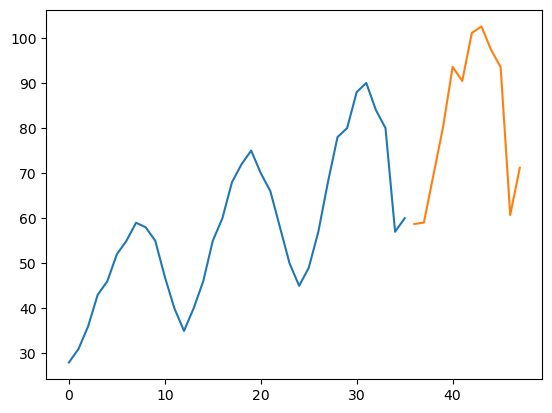

In [78]:
plt.plot(df['x'])
plt.plot(sarima_pred)

In [79]:
import requests
url = 'http://localhost:3000/' 
static_url = url + 'static/meritve.json'
post_url = url + 'krmilnik'

df = pd.read_json(static_url)

# Convert 't' column to datetime
df['t'] = pd.to_datetime(df['t'])

# Set 't' column as index
df.set_index('t', inplace=True)

# Define SARIMA model and fit to data
sarima_model = SARIMAX(df['x'], order=(1,1,3), seasonal_order=(0,1,1,12))
sarima_fit = sarima_model.fit()

# Use the index to create a new DataFrame with predicted values and timestamps
# simulacija pretoka(delim z 60 da dobimo realne vrednosti)
sarima_pred = sarima_fit.forecast(steps=12)/60

# Print the predicted values and timestamps
print(sarima_pred)

C:\Users\AMD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\AMD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
C:\Users\AMD\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


2023-02-22 22:24:00    0.978698
2023-02-22 22:25:00    0.983795
2023-02-22 22:26:00    1.159971
2023-02-22 22:27:00    1.336961
2023-02-22 22:28:00    1.559757
2023-02-22 22:29:00    1.507421
2023-02-22 22:30:00    1.685076
2023-02-22 22:31:00    1.708962
2023-02-22 22:32:00    1.623083
2023-02-22 22:33:00    1.559335
2023-02-22 22:34:00    1.012044
2023-02-22 22:35:00    1.186565
Freq: T, Name: predicted_mean, dtype: float64


In [80]:
def Temp_trans(dmpm, u=1, t=60.):
    dm=dmpm/60 #kg/s
    m=10.
    P=2000.
    c=4184.
    Tmv=20.
    Ttv=50.
    T = (-P*u*t/(m*c)-dm/m*t*Tmv+Ttv)/(1-dm/m*t)
    return T

In [81]:
import json

# Iterate through the series and create a list of dictionaries
data = []
for timestamp, value in sarima_pred.items():
    tVal = round(Temp_trans(value), 0)
    data.append({'d': str(timestamp), 'T': tVal})

# Convert the list to a JSON string
json_data = json.dumps(data)

print(json_data)

[{"d": "2023-02-22 22:24:00", "T": 50.0}, {"d": "2023-02-22 22:25:00", "T": 50.0}, {"d": "2023-02-22 22:26:00", "T": 51.0}, {"d": "2023-02-22 22:27:00", "T": 51.0}, {"d": "2023-02-22 22:28:00", "T": 52.0}, {"d": "2023-02-22 22:29:00", "T": 52.0}, {"d": "2023-02-22 22:30:00", "T": 53.0}, {"d": "2023-02-22 22:31:00", "T": 53.0}, {"d": "2023-02-22 22:32:00", "T": 52.0}, {"d": "2023-02-22 22:33:00", "T": 52.0}, {"d": "2023-02-22 22:34:00", "T": 50.0}, {"d": "2023-02-22 22:35:00", "T": 51.0}]


In [82]:
import json

data = []
lastVal = None

for timestamp, value in sarima_pred.items():
    tVal = round(Temp_trans(value), 0)
    if tVal != lastVal:
        data.append({'d': str(timestamp), 'T': tVal})
    
    lastVal = tVal

schedule_data_json = json.dumps(data)
schedule_data = json.loads(schedule_data_json)
print(schedule_data)

[{'d': '2023-02-22 22:24:00', 'T': 50.0}, {'d': '2023-02-22 22:26:00', 'T': 51.0}, {'d': '2023-02-22 22:28:00', 'T': 52.0}, {'d': '2023-02-22 22:30:00', 'T': 53.0}, {'d': '2023-02-22 22:32:00', 'T': 52.0}, {'d': '2023-02-22 22:34:00', 'T': 50.0}, {'d': '2023-02-22 22:35:00', 'T': 51.0}]


In [83]:
response = requests.post(post_url, json=schedule_data)
print(response.status_code)

200
